5 %
10 %
15 %
20 %
25 %
30 %
35 %
40 %
45 %
50 %
55 %
60 %
65 %
70 %
75 %
80 %
85 %
90 %
95 %
100 %


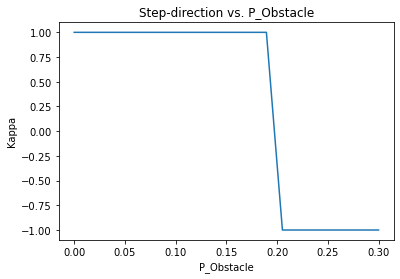

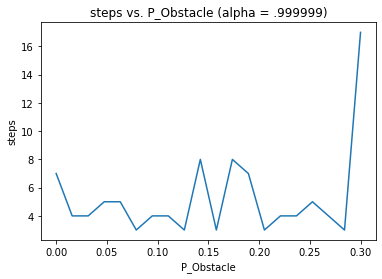

In [1]:
import fp_classes
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import time as tm

from celluloid import Camera
from datetime import date
import datetime

now = date.today().strftime("%y-%m-%dT") + datetime.datetime.now().strftime("%H_%M_%S")

kappa_list = []
resolution = 20
res_counter = 0
P_obstacle_array = np.linspace(0,1,resolution)
steps_last_episode = []

for P_obstacle_value in P_obstacle_array:

	env = fp_classes.environment()
	learner = fp_classes.agent(env)
	env.P_obstacle = P_obstacle_value
	res_counter += 1
	print(int(res_counter / resolution * 100), "%")    
	learning_list = [] # speichert episode & schritte

	T_XPOW2_DATAPOINTS = dict()
	T0 = tm.time()

	LAST_TRAJECTORY = []

	total_action_displacement = 0

	for episode in range(learner.N_episodes):
		steps = 0
		#if ((episode%(learner.N_episodes//100)) == 0) and episode:
			#progress = 1.*episode/learner.N_episodes
			#print("------------------------------------------")
			#print(f"Fortschritt: {progress}")

		learner.x = env.starting_position
		#learner.x = np.random.randint(0, env.N_states)
		minimum = abs(learner.x - env.target_position)
		if (minimum >=env.N_states/2):
			minimum = env.N_states - minimum
		minimum += 1
		learner.chosen_action = None

		while (learner.x != env.target_position) or learner.chosen_action != 1:
			if episode == learner.N_episodes-1: LAST_TRAJECTORY.append(learner.x)
			learner.adjust_epsilon(episode)
			learner.choose_action()
			learner.random_step(env)
			learner.stoch_obstacle(env)
			learner.perform_action(env)
			total_action_displacement += learner.chosen_action - 1
			learner.update_Q(env)
			steps += 1
		learning_list.append([episode, steps])
	steps_last_episode.append(learning_list[-1][1])
	kappa = total_action_displacement / np.abs(total_action_displacement)

	#print("Kappa: ", kappa)

	kappa_list.append(kappa)
    
fig,ax = plt.subplots()
plt.title("Step-direction vs. P_Obstacle")
plt.xlabel("P_Obstacle")
plt.ylabel("Kappa")
plt.plot(P_obstacle_array,kappa_list)
plt.show()
filename = f"Aufgabe_4_Plasczyk_Tobias_step-dir_vs_P_Obstacle" + str(now) + ".png"
fig.savefig(filename, bbox_inches='tight')


learning_array = np.array(learning_list)
fig,ax = plt.subplots()
plt.title("steps vs. P_Obstacle (alpha = .999999)")
plt.xlabel("P_Obstacle")
plt.ylabel("steps")
plt.plot(P_obstacle_array,steps_last_episode)
plt.show()
filename = f"Aufgabe_4_Plasczyk_Tobias_step-number_vs_P_Obstacle" + str(now) + ".png"
fig.savefig(filename, bbox_inches='tight')